In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.metrics import confusion_matrix
import time
import SparseAutoencoder as sa

In [2]:
def sigmoid_function(signal, derivative=False):
    if derivative:
        return np.multiply(signal, 1.0 - signal)
    else:
        return 1.0 / (1.0 + np.exp(-signal))

def subtract_err(outputs, targets):
    res = outputs - targets
    return res

In [3]:
def add_plot_images(images, cols=15, img_size=14, title=None):
    n_images = len(images)    
    fig = plt.figure(figsize=(30, 5))
    plt.title(title, fontsize=24)
    rows = int(n_images / cols)
    for i in range(1, n_images + 1):
        img = images[i - 1]
        fig.add_subplot(rows, cols, i)
        plt.imshow(img)

In [4]:
img_size = 28

helper = sa.mnist_helper()
train_lbl, train_img, test_lbl, test_img = helper.get_data()

x_data = train_img.reshape(-1, img_size * img_size) / float(256)
test_data = test_img.reshape(-1, img_size * img_size) / float(256)

In [5]:
num_hidden = 300
k = 10
learning_rate = 0.01
epochs = 3000
batch_size = 256
num_test_examples = 15

layers = [
        sa.SparseLayer(name="Input", n_in=x_data.shape[1], n_out=num_hidden,activation=sigmoid_function, num_k_sparse=k),
        sa.SparseLayer(name="Hidden 1", n_in=num_hidden, n_out=100,activation=sigmoid_function, num_k_sparse=k),
        sa.SparseLayer(name="Hidden 2", n_in=100, n_out=300,activation=sigmoid_function, num_k_sparse=k),
        sa.LinearLayer(name="Output", n_in=300, n_out=x_data.shape[1], activation=sigmoid_function)
]

model = sa.FCNeuralNet(layers=layers, cost_func=subtract_err)
model.summary(name='Sparse Autoencoder')

Sparse Autoencoder :
layer - Input: weights: (784, 300)
layer - Hidden 1: weights: (300, 100)
layer - Hidden 2: weights: (100, 300)
layer - Output: weights: (300, 784)


In [6]:
model.train(x_data, x_data, learning_rate=learning_rate, epochs=epochs,batch_size=batch_size, print_epochs=100)

epochs: 100, loss: 0.1413
epochs: 200, loss: 0.1401
epochs: 300, loss: 0.1369
epochs: 400, loss: 0.1349
epochs: 500, loss: 0.1244
epochs: 600, loss: 0.1216
epochs: 700, loss: 0.1162
epochs: 800, loss: 0.1131
epochs: 900, loss: 0.1118
epochs: 1000, loss: 0.1104
epochs: 1100, loss: 0.1105
epochs: 1200, loss: 0.1063
epochs: 1300, loss: 0.1025
epochs: 1400, loss: 0.1041
epochs: 1500, loss: 0.1039
epochs: 1600, loss: 0.0994
epochs: 1700, loss: 0.0986
epochs: 1800, loss: 0.1017
epochs: 1900, loss: 0.0989
epochs: 2000, loss: 0.0988
epochs: 2100, loss: 0.0969
epochs: 2200, loss: 0.1000
epochs: 2300, loss: 0.0976
epochs: 2400, loss: 0.0985
epochs: 2500, loss: 0.0929
epochs: 2600, loss: 0.0937
epochs: 2700, loss: 0.0997
epochs: 2800, loss: 0.1011
epochs: 2900, loss: 0.0972
epochs: 3000, loss: 0.0958
------------------------Training completed-----------------------
Training time: 00:01:58


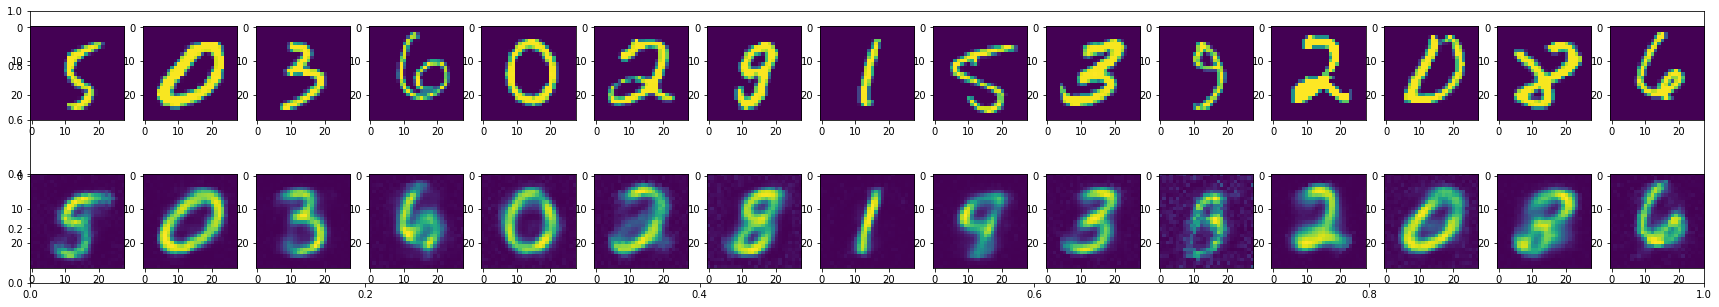

In [7]:
n = num_test_examples

test_samples = test_data[np.random.randint(test_data.shape[0], size=15)]
encode_samples = model.layers[0].weights.T
output_samples = model.predict(test_samples)

hidden_layer_op = model.feed_forward(test_samples)

img_input = test_samples.reshape(-1, img_size, img_size)
img_encode = encode_samples.reshape(-1, img_size, img_size)
img_output = output_samples.reshape(-1, img_size, img_size)

all_images = np.concatenate((img_input, img_output))
    
add_plot_images(all_images, cols=15, img_size=img_size)
plt.show()

In [8]:
c = sa.mnist_helper()
x_data = c.train_img.reshape(-1, 28 * 28) / float(256) 
x_data_re = model.predict(x_data)  
y_data = c.train_lbl

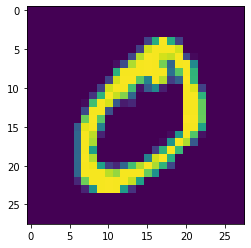

In [9]:
plt.imshow(x_data[1].reshape((28,28)))

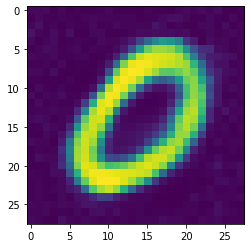

In [10]:
plt.imshow(x_data_re[1].reshape((28,28)))

In [11]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_data[500:], y_data[500:])
pred_op = neigh.predict(x_data[:500])
acco = np.all((pred_op == y_data[:500]), axis=1).sum() / pred_op.shape[0] * 100
print ('Accuracy on original: ', acco)

Accuracy on original:  96.2


In [12]:
neigh.fit(x_data_re[500:], y_data[500:])
pred_op = neigh.predict(x_data[:500])
accr = np.all((pred_op == y_data[:500]), axis=1).sum() / pred_op.shape[0] * 100
print ('Accuracy on reconstruted: ', accr)

Accuracy on reconstruted:  88.0


[[50  0  0  0  0  0  0  0  0  0]
 [ 2 63  0  0  0  0  0  0  1  0]
 [ 3  1 47  0  0  0  1  0  0  0]
 [ 4  0  0 45  0  0  0  1  0  0]
 [ 3  0  0  0 49  0  0  0  0  0]
 [ 6  1  0  1  0 27  0  0  3  1]
 [ 1  0  1  0  0  0 43  0  0  0]
 [ 8  0  1  0  3  0  0 39  0  1]
 [ 3  0  0  2  0  1  0  0 33  0]
 [ 3  0  0  2  3  0  0  3  0 44]]


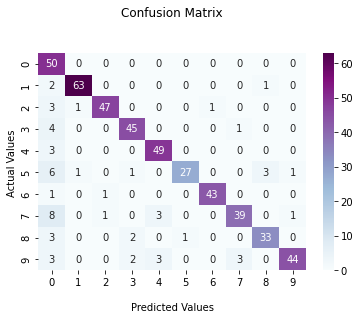

In [13]:
cf_matrix = confusion_matrix(np.argmax(y_data[:500], axis=1), np.argmax(pred_op, axis=1))
print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='BuPu')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()